In [1]:
!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling xgboost

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62589 sha256=1fc93be0ae32e894b1ec3aa892205300c05e9aeb2b6268b88e156fac22511aab
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ec\32\ec\dc8a1aa820182edf280a5e26c76fc9493ae29e196735708de2
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669716 sha256=3d3f7d082d2d66c86dcbc39ee4b01fcd6caadba9840904fbb44e8452ab67de4f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\53\73\ea\8a422aab5cab848d88653ed3087c1fa05553c3fbd67fb6ab75
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b4b19c498945d9783fa8ff7b518b3038fc6e0d03cf80af699a0828ba959ed46c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built dash-colorscales dash-daq htmlmin
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstallin

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline     
#magic function in IPython  In[101]
import matplotlib.pyplot as plt     # is a collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_train= pd.read_csv('C:/Users/HP/Downloads/train.csv')
df_test= pd.read_csv('C:/Users/HP/Downloads/test.csv')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.shape  

(8523, 12)

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Missing value imputation 

In [12]:
df_train['Item_Weight'].describe() 

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)  #replacing null values with mean values
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [14]:
df_train.isnull().sum()  

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [16]:
df_train['Outlet_Size']  #it is a categorical value 

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [17]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [19]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [20]:
df_train.isnull().sum()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### dimensionality reduction

In [22]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [23]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [24]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.857645,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


### EDA (Exploratory Data Analysis)

#### Explore the numerical values

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

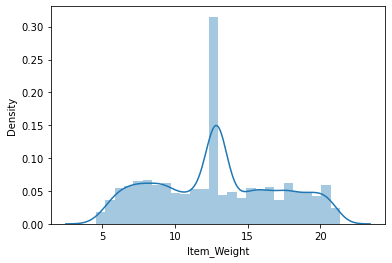

In [28]:
sns.distplot(df_train['Item_Weight'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

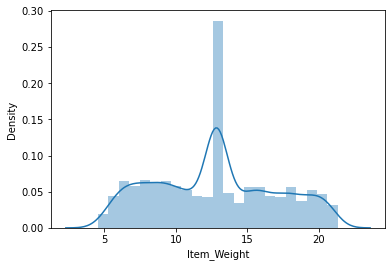

In [30]:
sns.distplot(df_test['Item_Weight'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

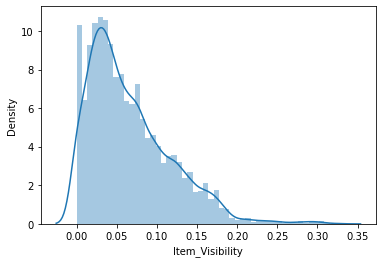

In [29]:
sns.distplot(df_train['Item_Visibility'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

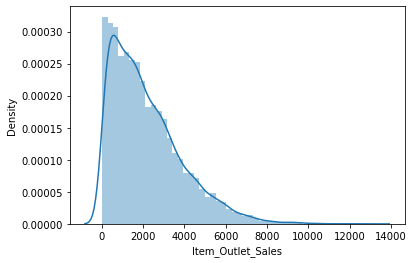

In [31]:
sns.distplot(df_train['Item_Outlet_Sales'])

#### Exploring the catogorical values

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

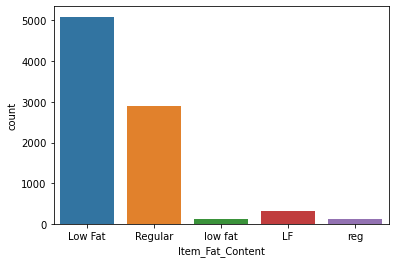

In [32]:
sns.countplot(df_train["Item_Fat_Content"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

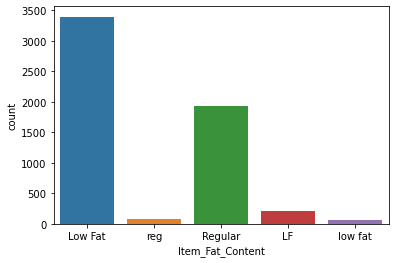

In [34]:
sns.countplot(df_test["Item_Fat_Content"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

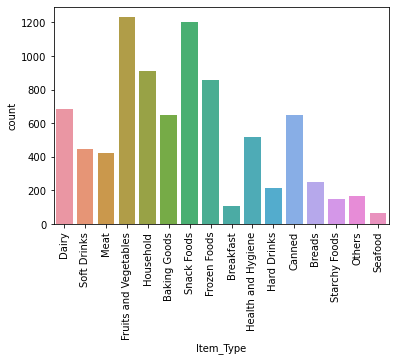

In [35]:
l = list(df_train['Item_Type'].unique())
chart = sns.countplot(df_train["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

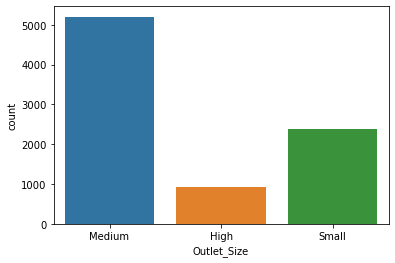

In [36]:
sns.countplot(df_train['Outlet_Size'])

<AxesSubplot:>

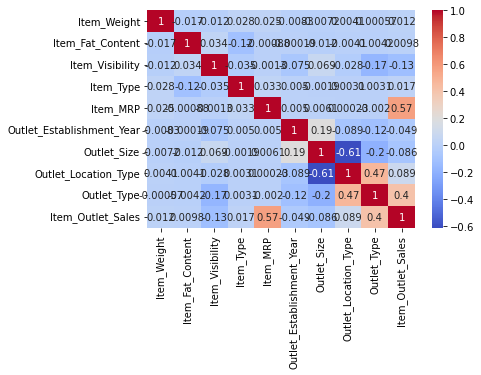

In [51]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Preprocessing

#### Label encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [50]:
df_train.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


#### Splitting the dataset into train and test

In [53]:
X=df_train.drop('Item_Outlet_Sales',axis=1)

In [54]:
Y=df_train['Item_Outlet_Sales']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

#### Standardization

In [56]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [57]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [58]:
X_train_std= sc.fit_transform(X_train)  # learning how the data is in X train and then transforming

In [59]:
X_test_std= sc.transform(X_test)

In [60]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [61]:
X_test_std

array([[-0.43860915, -0.57382672, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.57382672, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  0.97378032,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.57382672,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [62]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [63]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

### Model building

In [64]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,1,0.055163,8,100.3358,2009,1,2,2
8355,18.00,1,0.038979,13,148.6418,1987,0,2,1
3411,7.72,2,0.074731,1,77.5986,1997,2,0,1
7089,20.70,1,0.049035,6,39.9506,2007,1,1,1
6954,7.55,1,0.027225,3,152.9340,2002,1,1,1


In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Linear regression

In [66]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [67]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [68]:
LinearRegression()

LinearRegression()

In [72]:
Y_pred_lr=lr.predict(X_test_std)

In [73]:
r2_score(Y_test,Y_pred_lr)

0.5041875762809338

In [74]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875762809338
880.9999067141264
1162.4412660891483


#### Random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [96]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [97]:
y_pred_rf= rf.predict(X_test_std)

In [98]:
print(r2_score(Y_test,y_pred_rf))
print(mean_absolute_error(Y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,y_pred_rf)))

0.5496335599242863
780.4690130729618
1107.8866438966431


#### hyper parameter tuning

In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [100]:
# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

In [101]:
# define grid search
grid = dict(n_estimators=n_estimators)

In [103]:
grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

In [104]:
# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Best: 0.550 using {'n_estimators': 1000}
0.520 (0.005) with: {'n_estimators': 10}
0.547 (0.006) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


In [105]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [106]:
grid_search_forest.best_score_

0.5500258758466865

In [107]:
y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [108]:
r2_score(Y_test,y_pred_rf_grid)

0.5503412921848645

In [109]:
#SAVE

In [110]:
# use the best model to predict on test data
y_pred_rf_grid = grid_search_forest.predict(X_test_std)

# create a new dataframe with the predicted values
df_results = pd.DataFrame({'Item_Outlet_Sales': y_pred_rf_grid})

# save the dataframe to a CSV file
df_results.to_csv('predicted_results.csv', index=False)

In [111]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: C:\Users\HP


In [112]:
import os

# create results directory if it does not exist
if not os.path.exists("C:/Users/HP"):
    os.mkdir("C:/Users/HP")

# save dataframe as csv file in results directory
df_results.to_csv("C:/Users/HP/Big_mart_prediction.csv", index=False)